In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [118]:
df = pd.read_csv(r"..\notebook\data\data.csv")

In [119]:
df.head()

,Unnamed: 0,EventName,RoundNumber,eventYear,Team,Compound,Driver,Stint,bestPreRaceTime,bestLapTimeIsFrom,...,lapNumberAtBeginingOfStint,StintLen,CircuitLength,designedLaps,fuel_slope,fuel_bias,deg_slope,deg_bias,lag_slope_mean,lag_bias_mean
0,0,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,HARD,GIO,2.0,97.066,Qualifying,...,28.0,27.0,5.554,55,-0.109321,105.89063,0.056584,100.607381,NaN,NaN
1,1,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,HARD,RAI,2.0,97.555,Qualifying,...,12.0,43.0,5.554,55,0.005000,105.23700,-0.077195,106.352228,-0.010306,103.479805
2,2,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,GIO,1.0,97.066,Qualifying,...,1.0,27.0,5.554,55,-0.109321,105.89063,-0.365247,116.706700,NaN,NaN
3,3,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,RAI,1.0,97.555,Qualifying,...,1.0,10.0,5.554,55,0.005000,105.23700,0.216800,104.273100,-0.074224,110.489900
4,4,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,RAI,2.0,97.555,Qualifying,...,11.0,1.0,5.554,55,0.005000,105.23700,-0.077195,106.352228,NaN,NaN


In [120]:
df = df.drop(["Unnamed: 0"], axis=1)

In [121]:
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
categorial_inputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

num_features = [features for features in df.select_dtypes(exclude="object").columns]
cat_features = [features for features in df.select_dtypes(include="object").columns]

df[num_features] = numeric_imputer.fit_transform(df[num_features])
df[cat_features] = categorial_inputer.fit_transform(df[cat_features])

In [122]:
y = df["lapNumberAtBeginingOfStint"]
X = df.drop(columns=['lapNumberAtBeginingOfStint'],axis=1)

In [123]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_features = X.select_dtypes(exclude="object").columns
categorial_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, categorial_features),
         ("StandardScaler", numeric_transformer, numeric_features),        
    ]
)

In [124]:
X.head(2)

,EventName,RoundNumber,eventYear,Team,Compound,Driver,Stint,bestPreRaceTime,bestLapTimeIsFrom,meanAirTemp,...,TyreAge,StintLen,CircuitLength,designedLaps,fuel_slope,fuel_bias,deg_slope,deg_bias,lag_slope_mean,lag_bias_mean
0,Abu Dhabi Grand Prix,17.0,2020.0,Alfa Romeo Racing,HARD,GIO,2.0,97.066,Qualifying,22.596296,...,1.000000,27.0,5.554,55.0,-0.109321,105.89063,0.056584,100.607381,-0.034798,91.390772
1,Abu Dhabi Grand Prix,17.0,2020.0,Alfa Romeo Racing,HARD,RAI,2.0,97.555,Qualifying,22.893023,...,2.639982,43.0,5.554,55.0,0.005000,105.23700,-0.077195,106.352228,-0.010306,103.479805


In [125]:
X = preprocessor.fit_transform(X)

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3688, 113), (923, 113))

In [127]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [128]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Support Vector Regressor": SVR()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 10.1322
- Mean Absolute Error: 7.7655
- R2 Score: 0.6610
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.9672
- Mean Absolute Error: 7.5836
- R2 Score: 0.6832


Lasso
Model performance for Training set
- Root Mean Squared Error: 11.6947
- Mean Absolute Error: 8.9978
- R2 Score: 0.5484
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.6285
- Mean Absolute Error: 9.1318
- R2 Score: 0.5687


Ridge
Model performance for Training set
- Root Mean Squared Error: 10.1328
- Mean Absolute Error: 7.7629
- R2 Score: 0.6610
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.9559
- Mean Absolute Error: 7.5784
- R2 Score: 0.6839


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 7.4103
- Mean Absolute Error: 5.1524
- R2 Score: 0.8187
-------------------

# Result

In [129]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.927807
5,Random Forest Regressor,0.919215
6,XGBRegressor,0.916490
4,Decision Tree,0.838052
3,K-Neighbors Regressor,0.758918
8,AdaBoost Regressor,0.697321
2,Ridge,0.683886
0,Linear Regression,0.683167
9,Support Vector Regressor,0.672172
1,Lasso,0.568747


# Catboost Regressor

In [131]:
catboost_model = CatBoostRegressor()
catboost_model = catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.050319
0:	learn: 16.8408763	total: 6.5ms	remaining: 6.5s
1:	learn: 16.3021233	total: 9.63ms	remaining: 4.81s
2:	learn: 15.7957043	total: 13.1ms	remaining: 4.37s
3:	learn: 15.3321193	total: 16ms	remaining: 3.98s
4:	learn: 14.8846080	total: 20.4ms	remaining: 4.05s
5:	learn: 14.4720569	total: 23.7ms	remaining: 3.93s
6:	learn: 14.1152321	total: 26.3ms	remaining: 3.73s
7:	learn: 13.7385219	total: 28.8ms	remaining: 3.57s
8:	learn: 13.3899085	total: 31.4ms	remaining: 3.46s
9:	learn: 13.0708348	total: 35ms	remaining: 3.46s
10:	learn: 12.7608832	total: 37.6ms	remaining: 3.38s
11:	learn: 12.5031372	total: 40.1ms	remaining: 3.3s
12:	learn: 12.2176277	total: 42.7ms	remaining: 3.24s
13:	learn: 11.9994547	total: 45.6ms	remaining: 3.21s
14:	learn: 11.7691215	total: 48.6ms	remaining: 3.19s
15:	learn: 11.5328488	total: 52.9ms	remaining: 3.25s
16:	learn: 11.3396700	total: 56ms	remaining: 3.23s
17:	learn: 11.1613886	total: 58.9ms	remaining: 3.21s
18:	learn: 10.9733723	total: 61.5ms

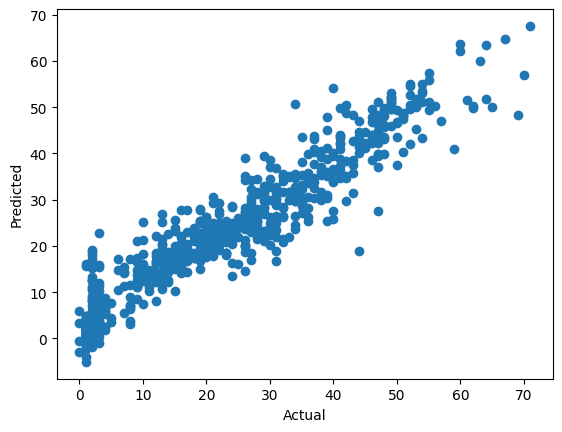

In [132]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='lapNumberAtBeginingOfStint'>

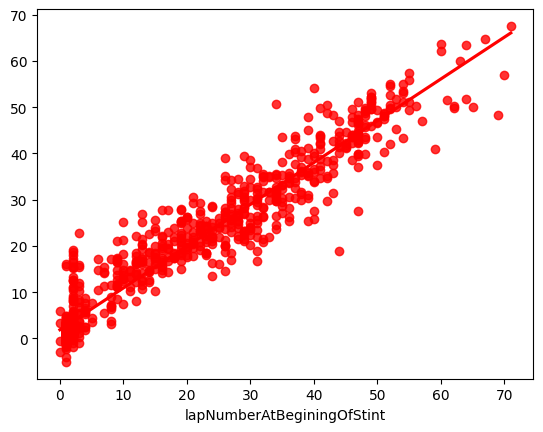

In [133]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1073,1.0,-0.152149,1.152149
2749,1.0,0.502931,0.497069
1374,22.0,21.355473,0.644527
4483,1.0,-0.099745,1.099745
3824,37.0,38.981228,-1.981228
...,...,...,...
506,3.0,5.712475,-2.712475
393,2.0,1.537180,0.462820
2379,4.0,4.984735,-0.984735
1512,3.0,3.848719,-0.848719
